In [19]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [20]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns = ["EIN","NAME", "ASK_AMT"], axis = 1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [21]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
STATUS                     2
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
IS_SUCCESSFUL              2
dtype: int64

In [22]:
# Look at APPLICATION_TYPE value counts for binning
application_value_counts = application_df.APPLICATION_TYPE.value_counts()
application_value_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_value_counts[application_value_counts < 66].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
Other       54
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

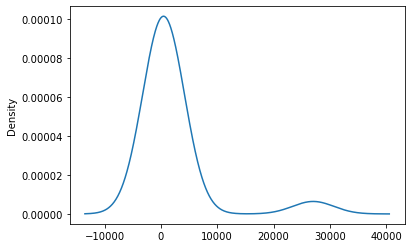

In [27]:
# Visualize the value counts of APPLICATION_TYPE
application_value_counts.plot.density()

In [30]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value[classification_value < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [31]:
# Look at CLASSIFICATION value counts for binning
classification_value = application_df.CLASSIFICATION.value_counts()
classification_value

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1197
C7000      777
C1700      287
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

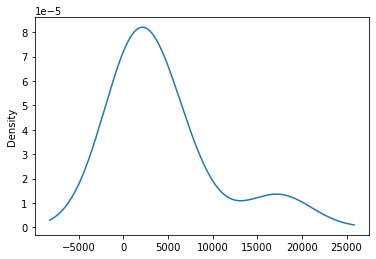

In [32]:
# Visualize the value counts of CLASSIFICATION
classification_value.plot.density()

In [8]:
# Generate our categorical variable lists
application_list = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [33]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_value[classification_value < 1800].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [34]:
# Generate our categorical variable lists
application_list = application_df.dtypes[application_df.dtypes == 'object'].index.tolist()

In [35]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_list]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_list)
encode_df.head()

C:\Users\mehro\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [36]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_list,1)
application_df.head()

C:\Users\mehro\AppData\Local\Temp\ipykernel_11136\1981764677.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_list,1)


,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [37]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

C:\Users\mehro\AppData\Local\Temp\ipykernel_11136\3061207589.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


In [38]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [39]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                4080      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6,541
Trainable params: 6,541
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [41]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [42]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
777/804 [===========================>..] - ETA: 0s - loss: 0.5757 - accuracy: 0.7184
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5756 - accuracy: 0.7181
Epoch 2/100
772/804 [===========================>..] - ETA: 0s - loss: 0.5569 - accuracy: 0.7287
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5572 - accuracy: 0.7282
Epoch 3/100
801/804 [============================>.] - ETA: 0s - loss: 0.5541 - accuracy: 0.7302
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7303
Epoch 4/100
801/804 [============================>.] - ETA: 0s - loss: 0.5512 - accuracy: 0.7299
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5515 - accuracy: 0.7297
Epoch 5/100
782/804 [=======================

801/804 [============================>.] - ETA: 0s - loss: 0.5396 - accuracy: 0.7354
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5395 - accuracy: 0.7356
Epoch 36/100
773/804 [===========================>..] - ETA: 0s - loss: 0.5391 - accuracy: 0.7373
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5391 - accuracy: 0.7376
Epoch 37/100
800/804 [============================>.] - ETA: 0s - loss: 0.5392 - accuracy: 0.7377
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7378
Epoch 38/100
804/804 [==============================] - ETA: 0s - loss: 0.5390 - accuracy: 0.7374
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5390 - accuracy: 0.7374
Epoch 39/100
803/804 [===========================

802/804 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7380
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7380
Epoch 70/100
802/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7391
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5360 - accuracy: 0.7391
Epoch 71/100
798/804 [============================>.] - ETA: 0s - loss: 0.5356 - accuracy: 0.7395
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5362 - accuracy: 0.7389
Epoch 72/100
796/804 [============================>.] - ETA: 0s - loss: 0.5361 - accuracy: 0.7385
Epoch 72: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7388
Epoch 73/100
772/804 [===========================

In [43]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5602 - accuracy: 0.7276 - 482ms/epoch - 2ms/step
Loss: 0.5601524114608765, Accuracy: 0.727580189704895


In [44]:
nn.save("AlphabetSoupCharity_optimization.h5")

# ATTEMPT 2


In [46]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output Layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 80)                4080      
                                                                 
 dense_7 (Dense)             (None, 50)                4050      
                                                                 
 dense_8 (Dense)             (None, 30)                1530      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 9,691
Trainable params: 9,691
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [48]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [51]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 5/100
779/804 [============================>.] - ETA: 0s - loss: 8.1889 - accuracy: 0.4691
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 9/100
804/804 [==============================] -

804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 64/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 65/100
797/804 [============================>.] - ETA: 0s - loss: 8.1993 - accuracy: 0.4684
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 8.2024 - accuracy: 0.4682
Epoch 70/100
799/804 [============================>.] - ETA: 0s - loss: 8.1963 - accuracy: 0.4686
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 8.2422 - accuracy: 0.4657 - 305ms/epoch - 1ms/step
Loss: 8.242232322692871, Accuracy: 0.46565598249435425


In [53]:
nn.save("AlphabetSoupCharity_optimization.h5")

# Attempt 3

In [55]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 75
hidden_nodes_layer3 = 50
hidden_nodes_layer4 = 25


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Forth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output Layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 100)               5100      
                                                                 
 dense_14 (Dense)            (None, 75)                7575      
                                                                 
 dense_15 (Dense)            (None, 50)                3800      
                                                                 
 dense_16 (Dense)            (None, 25)                1275      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 17,776
Trainable params: 17,776
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [57]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [58]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5951 - accuracy: 0.6970
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5665 - accuracy: 0.7237
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5599 - accuracy: 0.7267
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5574 - accuracy: 0.7294
Epoch 5/100
773/804 [===========================>..] - ETA: 0s - loss: 0.5553 - accuracy: 0.7295
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5556 - accuracy: 0.7292
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.7301
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5538 - accuracy: 0.7301
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5533 - accuracy: 0.7308
Epoch 9/100
804/804 [==============================] -

804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7386
Epoch 64/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7382
Epoch 65/100
791/804 [============================>.] - ETA: 0s - loss: 0.5368 - accuracy: 0.7386
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5365 - accuracy: 0.7388
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5361 - accuracy: 0.7384
Epoch 67/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5358 - accuracy: 0.7388
Epoch 68/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.7392
Epoch 69/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5357 - accuracy: 0.7397
Epoch 70/100
776/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7388
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 

In [59]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5734 - accuracy: 0.7290 - 467ms/epoch - 2ms/step
Loss: 0.5733628273010254, Accuracy: 0.7289795875549316


In [ ]:
nn.save("AlphabetSoupCharity_optimization.h5")